## Homework 03: due 2024/04/25 23:59(100%)

### - Tutorial : 
___1. scipy.signal.convolve2d:___ https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

___2. OpenCV2 Convolution:___ https://blog.csdn.net/hysterisis/article/details/113097507

___3. cv2.filter2D:___ https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04 
                   
### - After you go through the tutorials, you should be able to work on this assignment.

### - Please directly answer the following questions and work on this jupyter notebook.

### - Make sure the code can be run and show the result and figures properly.

### - Please briefly write down your observation with markdown in this notebook.

In [1]:
import cv2
import os
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

#### 1. Please use the defined input matrix and the kernel below, and use the ___scipy.signal.convolve2d___ and ___cv2.filter2D___ to implement the convolution operation. The result output after convolution is given for your reference. (With half zero padding to make the shape fixed) (50%)

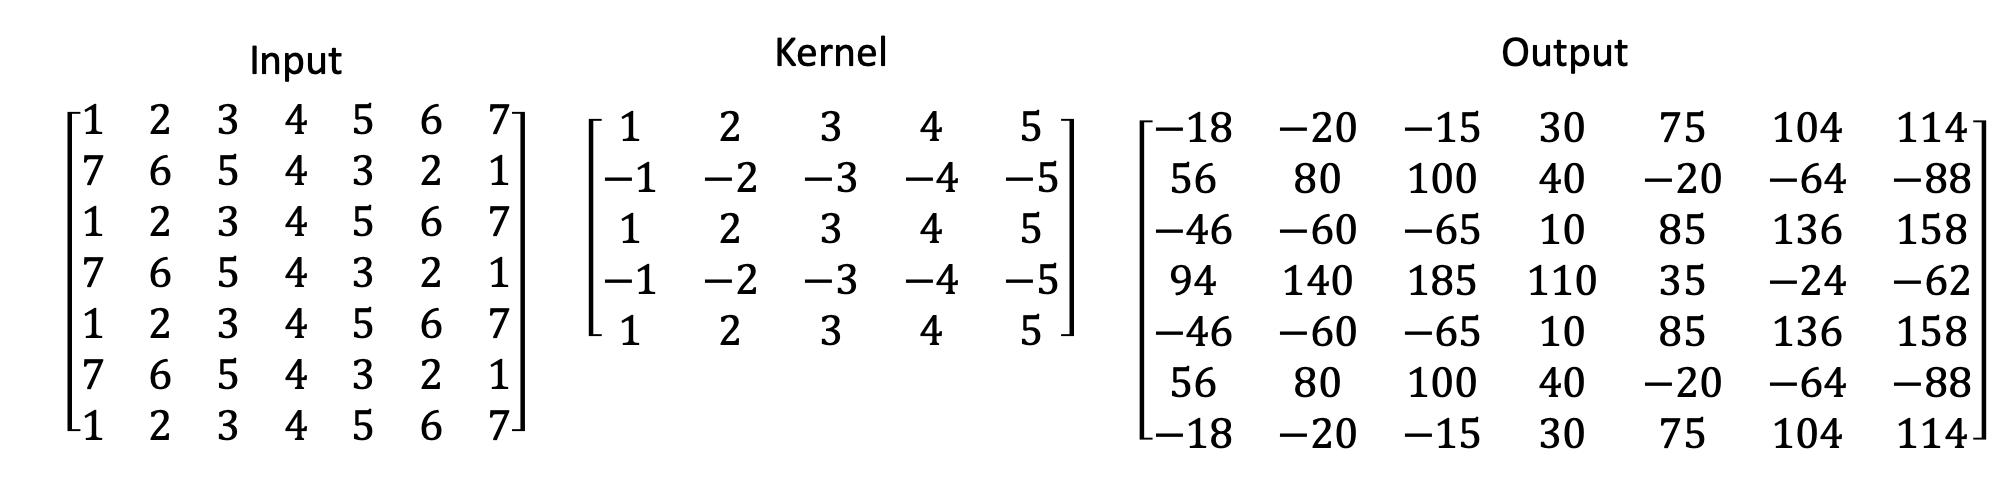

In [2]:
input = np.array([[1, 2, 3, 4, 5, 6, 7],
                  [7, 6, 5, 4, 3, 2, 1],
                  [1, 2, 3, 4, 5, 6, 7],
                  [7, 6, 5, 4, 3, 2, 1],
                  [1, 2, 3, 4, 5, 6, 7],
                  [7, 6, 5, 4, 3, 2, 1],
                  [1, 2, 3, 4, 5, 6, 7],], dtype=np.float32)

kernel = np.array([[ 1,  2,  3,  4,  5],
                   [-1, -2, -3, -4, -5],
                   [ 1,  2,  3,  4,  5],
                   [-1, -2, -3, -4, -5],
                   [ 1,  2,  3,  4,  5],], dtype=np.float32)

output1 = signal.convolve2d(input, kernel, mode='same')
output2 = cv2.filter2D(src=input, ddepth=-1, kernel=cv2.flip(kernel, -1), borderType=cv2.BORDER_CONSTANT)

print("Scipy output:\n", output1)
print("\nOpenCV output:\n", output2)

Scipy output:
 [[-18. -20. -15.  30.  75. 104. 114.]
 [ 56.  80. 100.  40. -20. -64. -88.]
 [-46. -60. -65.  10.  85. 136. 158.]
 [ 94. 140. 185. 110.  35. -24. -62.]
 [-46. -60. -65.  10.  85. 136. 158.]
 [ 56.  80. 100.  40. -20. -64. -88.]
 [-18. -20. -15.  30.  75. 104. 114.]]

OpenCV output:
 [[-18. -20. -15.  30.  75. 104. 114.]
 [ 56.  80. 100.  40. -20. -64. -88.]
 [-46. -60. -65.  10.  85. 136. 158.]
 [ 94. 140. 185. 110.  35. -24. -62.]
 [-46. -60. -65.  10.  85. 136. 158.]
 [ 56.  80. 100.  40. -20. -64. -88.]
 [-18. -20. -15.  30.  75. 104. 114.]]


## Answer:

`scipy.signal.convolve2d` performs mathematical convolution, flipping the kernel, whereas `cv2.filter2D` performs correlation without flipping, unless the kernel is manually flipped. OpenCV's `cv2.filter2D` offers more options for border handling and is optimized for image processing tasks.

#### 2. Please do the covolution operation on your own image or on the given __test.jpg__ with all the kernels below. (50%)

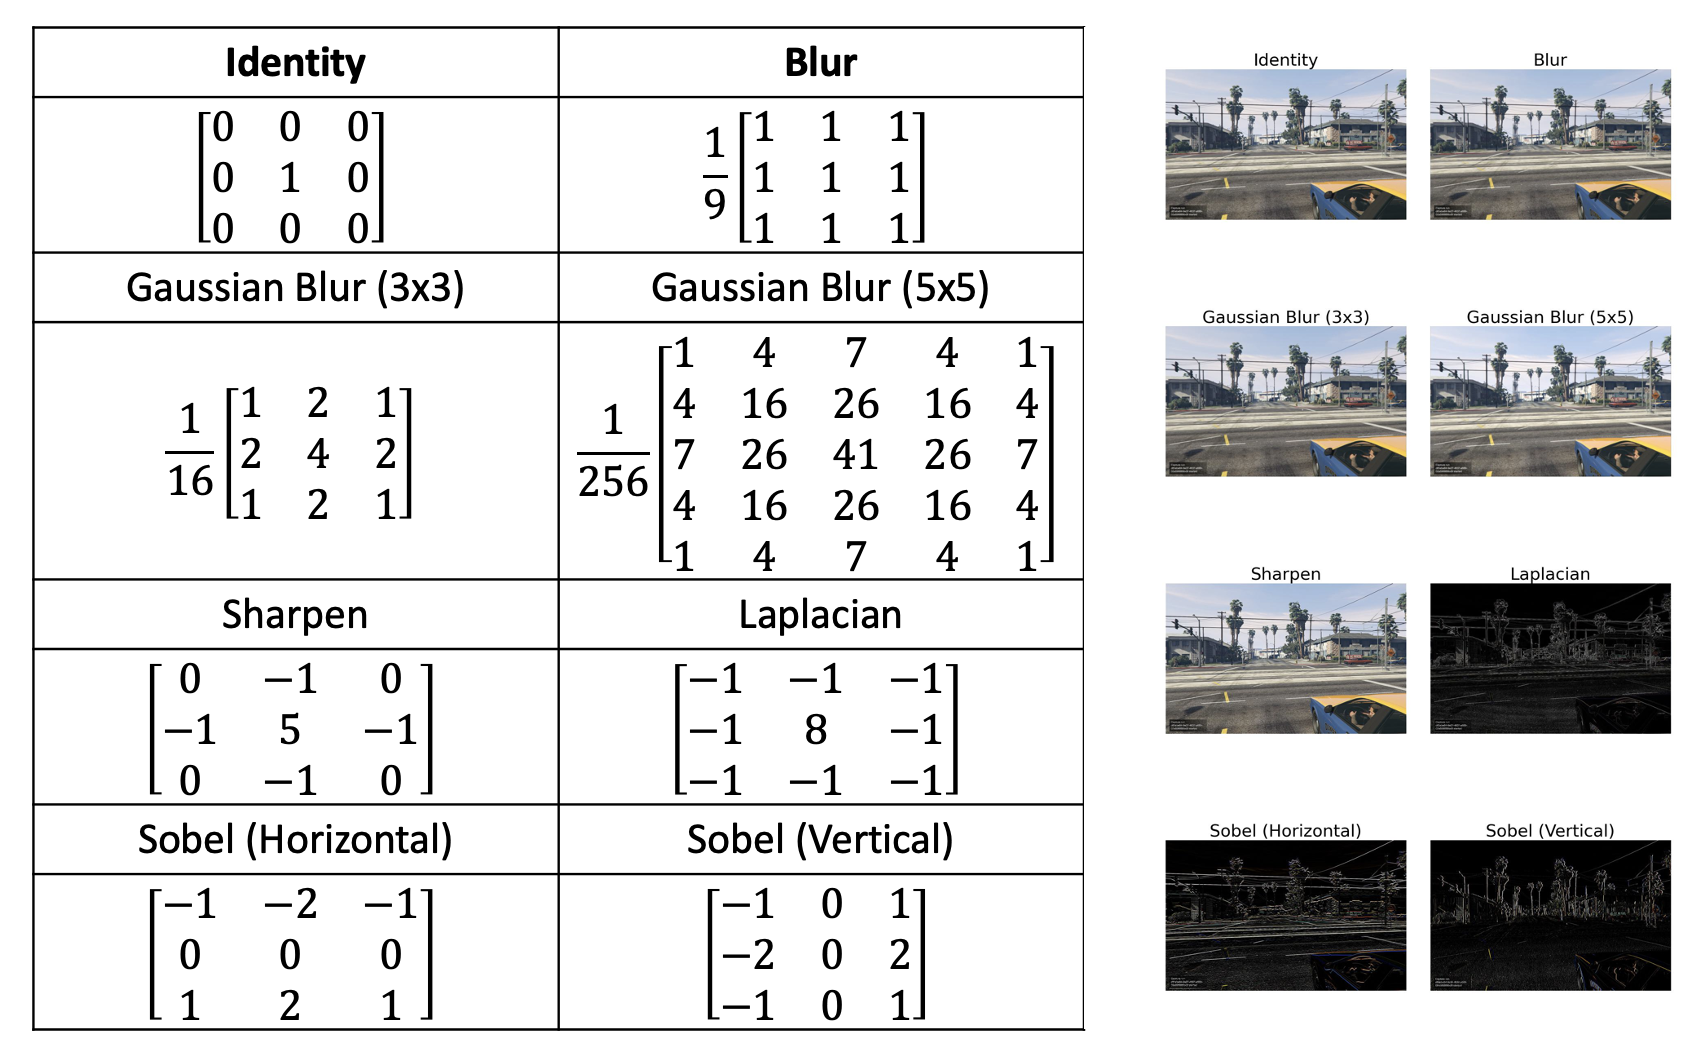

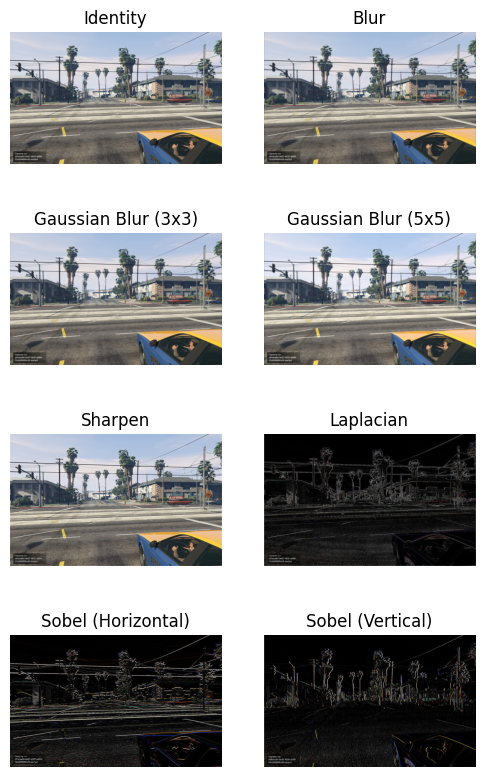

In [3]:
img = cv2.imread("test.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel_identity = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]])
kernel_blur = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]]) / 9
kernel_gaussian_blur_3 = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]]) / 16
kernel_gaussian_blur_5 = np.array([
    [1,  4,  7,  4, 1],
    [4, 16, 26, 16, 4],
    [7, 26, 41, 26, 7],
    [4, 16, 26, 16, 4],
    [1,  4,  7,  4,  1]]) / 256
kernel_sharpen = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]])
kernel_laplacian = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]])
kernel_sobel_horizontal = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]])
kernel_sobel_vertical = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]])
kernel_all = [kernel_identity, kernel_blur, kernel_gaussian_blur_3, kernel_gaussian_blur_5, kernel_sharpen, kernel_laplacian, kernel_sobel_horizontal, kernel_sobel_vertical]
kernel_name = ["Identity", "Blur", "Gaussian Blur (3x3)", "Gaussian Blur (5x5)", "Sharpen", "Laplacian", "Sobel (Horizontal)", "Sobel (Vertical)"]

fig, ax = plt.subplots(4, 2, figsize=(6, 10))
for i, x in enumerate(kernel_all):
    output = cv2.filter2D(src=img, ddepth=-1, kernel=x, borderType=cv2.BORDER_CONSTANT)
    ax[int(i//2), int(i%2)].imshow(output)
    ax[int(i//2), int(i%2)].set_title(kernel_name[i])
    ax[int(i//2), int(i%2)].axis("off")
plt.show()

## Answer:

The images provided show different convolution kernels applied to an image using OpenCV in Python. Each kernel performs a specific image processing function:

1. Identity: Preserves the original image.
2. Blur: Averages neighboring pixels, smoothing the image.
3. Gaussian Blur (3x3 and 5x5): Blurs the image using a Gaussian filter, with a smoother result for the larger kernel.
4. Sharpen: Enhances edges by highlighting the contrast between neighboring pixels.
5. Laplacian: Detects edges by finding regions of rapid intensity change.
6. Sobel (Horizontal and Vertical): Detects horizontal and vertical edges separately.

The final image appears to show the results of applying each kernel to a test image, illustrating the different effects.